In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_csv('Anexo 1 - Attrition.csv', sep=',')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [13]:
# Preprocesamiento de los datos
# Convertir variables categóricas como 'OverTime', 'Gender', 'MaritalStatus' en variables numéricas
df1['OverTime'] = df1['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df1['Gender'] = df1['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df1['MaritalStatus'] = df1['MaritalStatus'].map({'Single': 0, 'Married': 1, 'Divorced': 2})

In [15]:
# Seleccionar las variables predictoras (sin la variable objetivo)
X = df1[['OverTime', 'MonthlyIncome', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'DistanceFromHome', 'Gender', 'MaritalStatus']]

In [21]:
# Escalar las variables numéricas para mejorar el rendimiento del modelo
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=42)

In [25]:
# Obtener los clústeres asignados
df1['Cluster'] = kmeans.labels_

In [27]:
# Ver los clústeres asignados
print(df1[['OverTime', 'MonthlyIncome', 'YearsSinceLastPromotion', 'NumCompaniesWorked', 'TrainingTimesLastYear', 'DistanceFromHome', 'Gender', 'MaritalStatus', 'Cluster']].head())

   OverTime  MonthlyIncome  YearsSinceLastPromotion  NumCompaniesWorked  \
0         1           5993                        0                   8   
1         0           5130                        1                   1   
2         1           2090                        0                   6   
3         1           2909                        3                   1   
4         0           3468                        2                   9   

   TrainingTimesLastYear  DistanceFromHome  Gender  MaritalStatus  Cluster  
0                      0                 1       0              0        1  
1                      3                 8       1              1        0  
2                      3                 2       1              0        1  
3                      3                 3       0              1        1  
4                      3                 2       1              1        0  


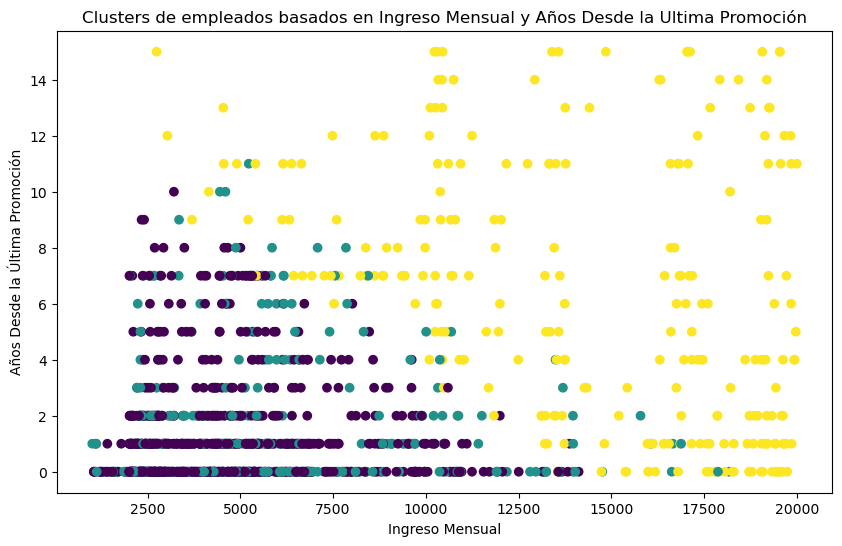

In [31]:
# Visualización de los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(df1['MonthlyIncome'], df1['YearsSinceLastPromotion'], c=df1['Cluster'], cmap='viridis')
plt.title('Clusters de empleados basados en Ingreso Mensual y Años Desde la Ultima Promoción')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Años Desde la Ultima Promoción')
plt.show()